In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv('E:\Marketing, Advertising & Data Science\Python & R projects\churn data.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
len(data)
data.shape

(10000, 12)

In [5]:
data.isnull().values.any()

True

In [6]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [7]:
data[["EstimatedSalary","Age"]].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [8]:
data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#value_counts gives count of values taken by the variable 
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [10]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [11]:
data.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [12]:
data.isna().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [13]:
#percent of missing values in respective columns
(data.isna().mean().round(4))*100

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [14]:
data[["Gender","Age","EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [15]:
#Imputing missing values in Estimated salary column with mean value
mean_value=data['EstimatedSalary'].mean()
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value)

In [16]:
data.isna().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [17]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [18]:
#Since there are more males than females, fill in missing values with males as a rule of thumb
data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().idxmax())

In [19]:
data.isna().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [20]:
#Replace age missing values with mode of the data
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

In [21]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [22]:
mode_value[0]

37.0

In [23]:
data = data.rename(columns={'CredRate': 'CreditScore',\
'ActMem' : 'IsActiveMember',\
'Prod Number': 'NumOfProducts',\
'Exited':'Churn'})

In [24]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [25]:
data.drop(labels=['CustomerId'], axis=1,inplace = True)
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [27]:
#We convert some columns to categories as they were objects/strings before
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"]\
.astype('category')

In [28]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


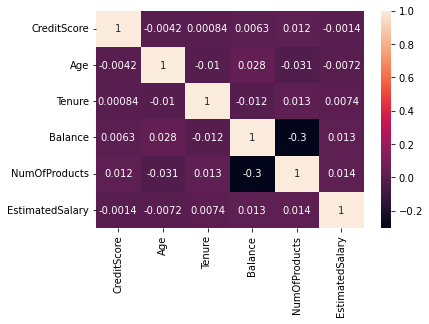

In [30]:
#USEFUL: correlation heatmap among variables
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
corr

In [31]:
data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [32]:
#What proportion/% of customers churned and what didn't
data['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [33]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [34]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [35]:
data.quantile(0.25)

CreditScore          584.00
Age                   32.00
Tenure                 3.00
Balance                0.00
NumOfProducts          1.00
EstimatedSalary    51002.11
Name: 0.25, dtype: float64

In [36]:
data["CreditScore"].quantile(0.25)

584.0

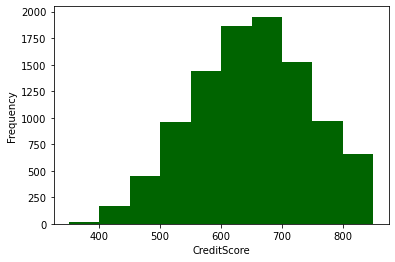

In [37]:
data.CreditScore.plot.hist(color='darkgreen')
plt.xlabel('CreditScore')
plt.show()

In [38]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,102460.84


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\KISHOLOY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KISHOLOY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KISHOLOY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

Text(0, 0.5, 'No of Customers')

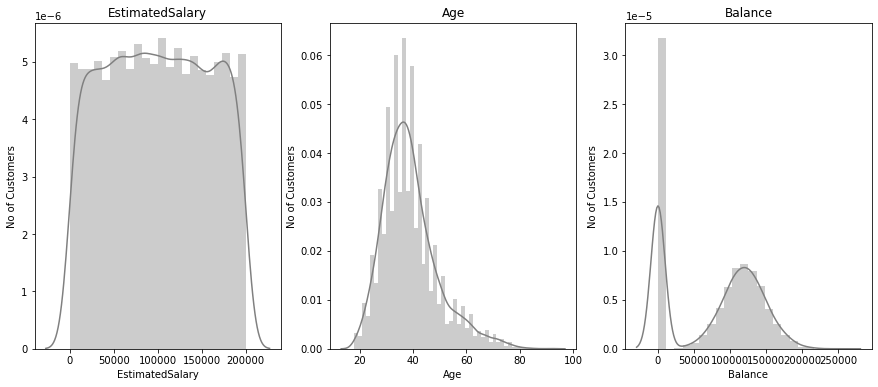

In [55]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.EstimatedSalary, kde=True, color="gray", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Age, kde=True, color="gray", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Balance, kde=True, color="gray", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

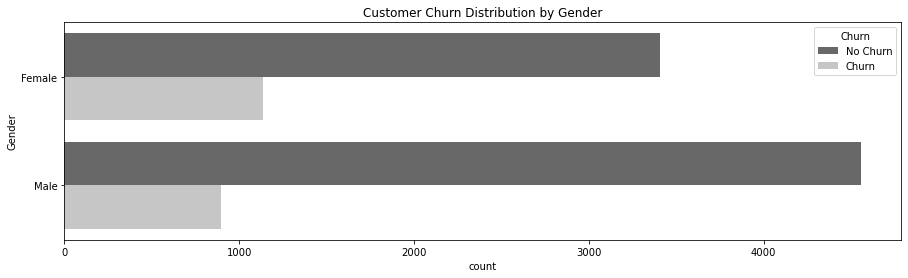

In [40]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Churn', data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Geography vs Churn')

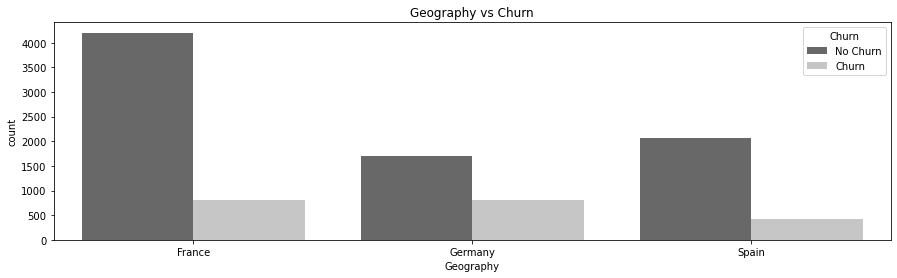

In [41]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='Churn', data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Geography vs Churn')

Text(0.5, 1.0, 'Customer Geography Distribution')

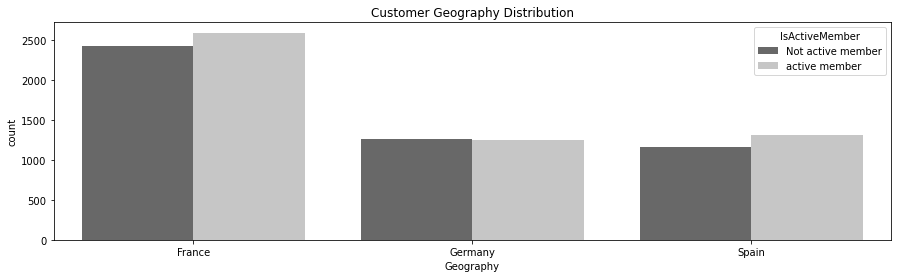

In [42]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='IsActiveMember', data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("Not active member")
legend_txt[1].set_text("active member")
p.set_title('Customer Geography Distribution')

In [43]:
data.groupby("Geography")["IsActiveMember"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: IsActiveMember, dtype: int64

Text(0.5, 1.0, 'Customer Distribution by Product')

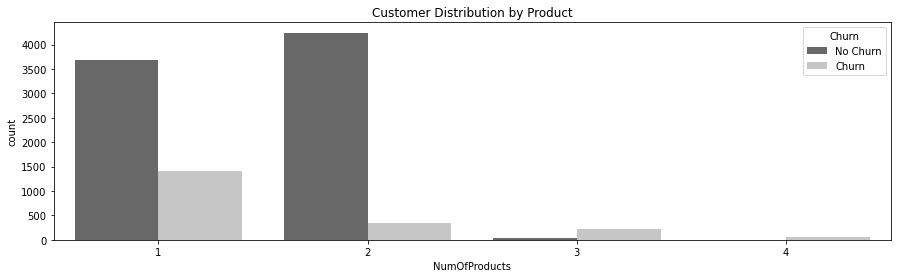

In [44]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='NumOfProducts', hue='Churn', data=data, palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

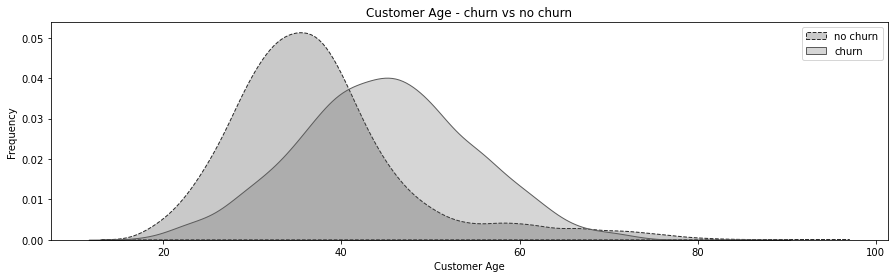

In [45]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , color=sns.color_palette("Greys_r")[0], shade=True,label='no churn', linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , color=sns.color_palette("Greys_r")[1], shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend()

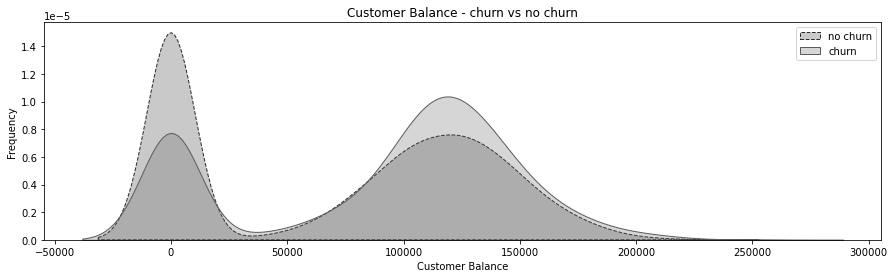

In [46]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , color=sns.color_palette("Greys_r")[0],\
shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , color=sns.color_palette("Greys_r")[1],\
shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend()

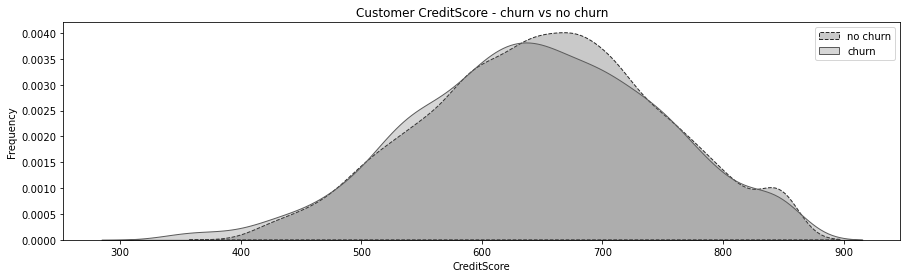

In [47]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , color=sns.color_palette("Greys_r")[0],\
shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , color=sns.color_palette("Greys_r")[1],\
shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')
plt.legend()

Text(0.5, 1.0, 'Number of Product VS Balance')

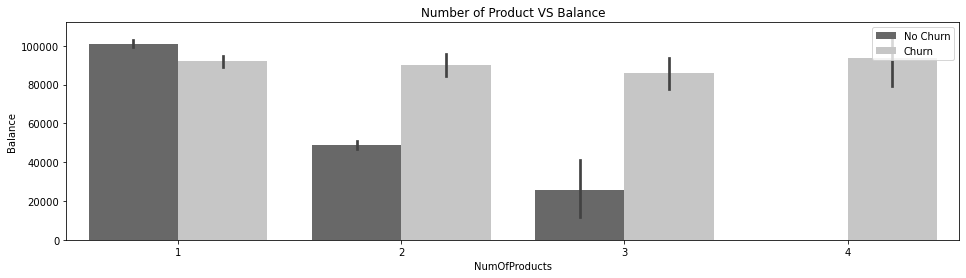

In [49]:
plt.figure(figsize=(16,4))
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn', data=data, palette="Greys_r")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')

In [86]:
data.loc[(data['Churn'] == 0),'CreditScore'].head(5)

1    608
3    699
4    850
6    822
8    501
Name: CreditScore, dtype: int64

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [59]:
data.dtypes
### Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [60]:
data.dtypes

CreditScore           int64
Geography              int8
Gender                 int8
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard              int8
IsActiveMember     category
EstimatedSalary     float64
Churn                  int8
dtype: object

In [61]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [69]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [70]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [71]:
importances=forest.feature_importances_

In [88]:
features = data.drop(['Churn'],axis=1).columns
indices = np.argsort(importances)[::-1]
indices

array([3, 9, 0, 5, 6, 4, 8, 1, 2, 7], dtype=int64)

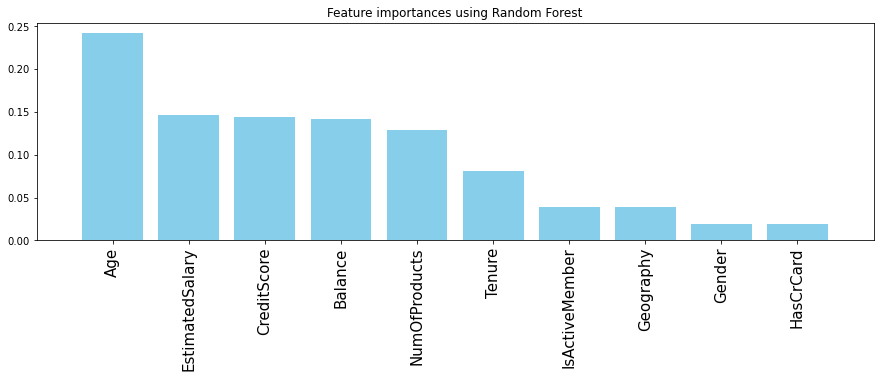

In [80]:
plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [87]:
feature_importance_df = pd.DataFrame({"Feature":features,\
"Importance":importances})
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.143886
1        Geography    0.038548
2           Gender    0.019299
3              Age    0.241954
4           Tenure    0.081503
5          Balance    0.141760
6    NumOfProducts    0.128461
7        HasCrCard    0.019139
8   IsActiveMember    0.038878
9  EstimatedSalary    0.146571
